## Assignment 11  

### Clustering 

In [26]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt 
import seaborn as sns 

Artificial datasets will be used. The ground truth shall be considered known.

In [ ]:
    blobs_data = datasets.make_blobs(n_samples=800,
                                     n_features=2, 
                                     centers=3,
                                     center_box=(-10,10),
                                     cluster_std=blod_std,
                                     random_state=613)

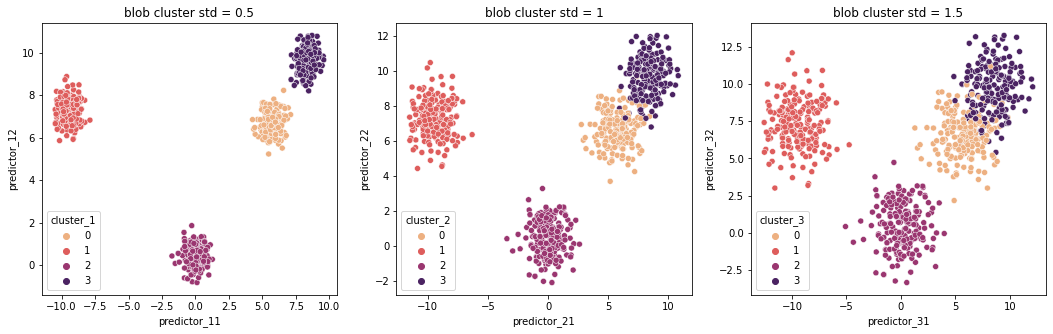

In [94]:
for n, blod_std in zip([1,2,3], [0.5, 1, 1.5]):
    blobs_data = datasets.make_blobs(n_samples=800,
                                     n_features=2, 
                                     centers=3,
                                     center_box=(-10,10),
                                     cluster_std=blod_std,
                                     random_state=613)

    X, y = blobs_data[0], blobs_data[1]
    df = pd.DataFrame(data={f'predictor_{n}1': X[:,0],
                            f'predictor_{n}2': X[:,1],
                            f'cluster_{n}': y})
    if n==1:
        blob_df=df
    else:
        blob_df=pd.concat([blob_df, df], axis=1)

# plot the results
plt.figure(figsize=(18, 5))
for n, blod_std in zip([1,2,3], [0.5, 1, 1.5]):
    plt.subplot(1,3,n)
    sns.scatterplot(x=f'predictor_{n}1', y=f'predictor_{n}2', hue=f'cluster_{n}', data=blob_df, palette='flare')
    plt.title(f'blob cluster std = {blod_std}')

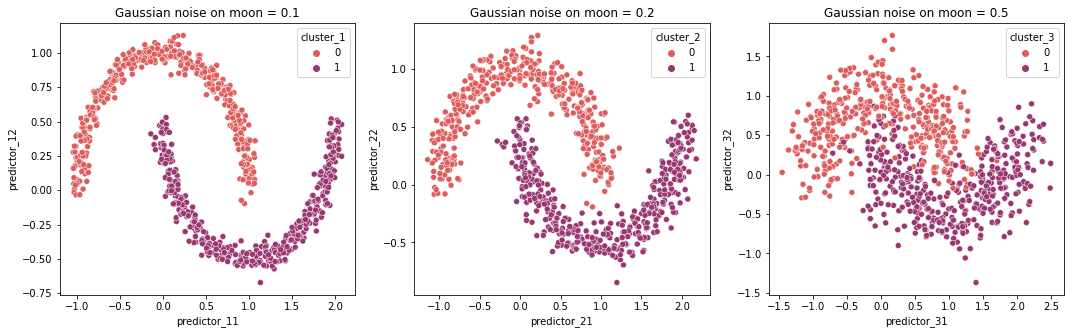

In [97]:
for n, moon_noise in zip([1,2,3], [0.05, 0.1, 0.25]):
    moons_data = datasets.make_moons(n_samples=800,
                                     noise=moon_noise,
                                     random_state=613)

    X, y = moons_data[0], moons_data[1]
    df = pd.DataFrame(data={f'predictor_{n}1': X[:,0],
                            f'predictor_{n}2': X[:,1],
                            f'cluster_{n}': y})
    if n==1:
        moon_df=df
    else:
        moon_df=pd.concat([moon_df, df], axis=1)

# plot the results
plt.figure(figsize=(18, 5))
for n, moon_noise in zip([1,2,3], [0.05, 0.1, 0.25]):
    plt.subplot(1,3,n)
    sns.scatterplot(x=f'predictor_{n}1', y=f'predictor_{n}2', hue=f'cluster_{n}', data=moon_df, palette='flare')
    plt.title(f'Gaussian noise on moon = {moon_noise}')

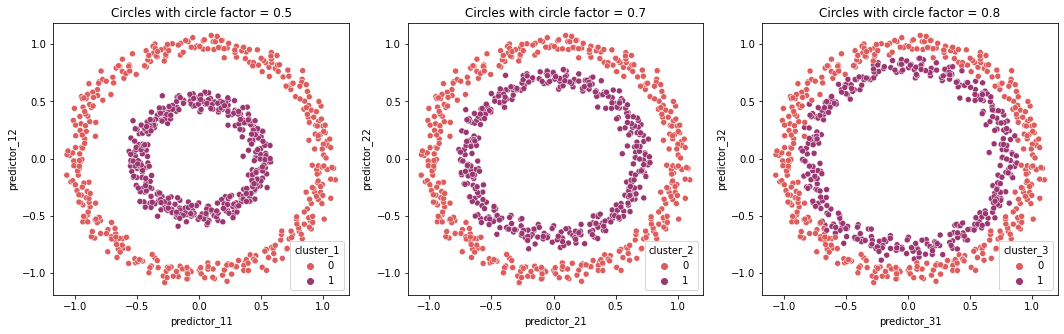

In [104]:
for n, circle_factor in zip([1,2,3], [0.5, 0.7, 0.8]):
    circles_data = datasets.make_circles(n_samples=800,
                                         noise=0.05,
                                         factor=circle_factor,
                                         random_state=613)

    X, y = circles_data[0], circles_data[1]
    df = pd.DataFrame(data={f'predictor_{n}1': X[:,0],
                            f'predictor_{n}2': X[:,1],
                            f'cluster_{n}': y})
    if n==1:
        circles_df=df
    else:
        circles_df=pd.concat([circles_df, df], axis=1)

# plot the results
plt.figure(figsize=(18, 5))
for n, circle_factor in zip([1,2,3], [0.5, 0.7, 0.8]):
    plt.subplot(1,3,n)
    sns.scatterplot(x=f'predictor_{n}1', y=f'predictor_{n}2', hue=f'cluster_{n}', data=circles_df, palette='flare')
    plt.title(f'Circles with circle factor = {circle_factor}')